In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
df = pd.read_csv("Tesla.csv - Tesla.csv.csv")

In [5]:
df

Date        Open        High         Low       Close    Volume  \
0     6/29/2010   19.000000   25.000000   17.540001   23.889999  18766300   
1     6/30/2010   25.790001   30.420000   23.299999   23.830000  17187100   
2      7/1/2010   25.000000   25.920000   20.270000   21.959999   8218800   
3      7/2/2010   23.000000   23.100000   18.709999   19.200001   5139800   
4      7/6/2010   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998   3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000   7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996   4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988   7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1      23.830000  
2      21.959999  
3      19.200001  
4      16.110001  
...          ...  
1687  246.169998  
1688  258.000000  
1689  255.729996  
1690  262.049988  
1691  261.500000  

[1692 rows x 7 columns]

In [6]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 100, size=(1000, 1)), columns=['Close'])

In [7]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [8]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        end_ix = i + seq_length
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [9]:
# Create sequences of length 50 (adjust as needed)
sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

In [10]:

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
 #Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
 #Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
21/21 [==============================] - 6s 44ms/step - loss: 0.1344
Epoch 2/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0971
Epoch 3/10
21/21 [==============================] - 1s 44ms/step - loss: 0.0931
Epoch 4/10
21/21 [==============================] - 1s 44ms/step - loss: 0.0958
Epoch 5/10
21/21 [==============================] - 1s 52ms/step - loss: 0.0947
Epoch 6/10
21/21 [==============================] - 2s 72ms/step - loss: 0.0965
Epoch 7/10
21/21 [==============================] - 2s 76ms/step - loss: 0.0940
Epoch 8/10
21/21 [==============================] - 1s 50ms/step - loss: 0.0948
Epoch 9/10
21/21 [==============================] - 1s 58ms/step - loss: 0.0945
Epoch 10/10
21/21 [==============================] - 1s 45ms/step - loss: 0.0927


In [15]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0909
Test Loss: 0.0919


In [16]:

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

9/9 [==============================] - 0s 23ms/step


In [17]:
# Inverse transform the predictions (to get actual prices)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

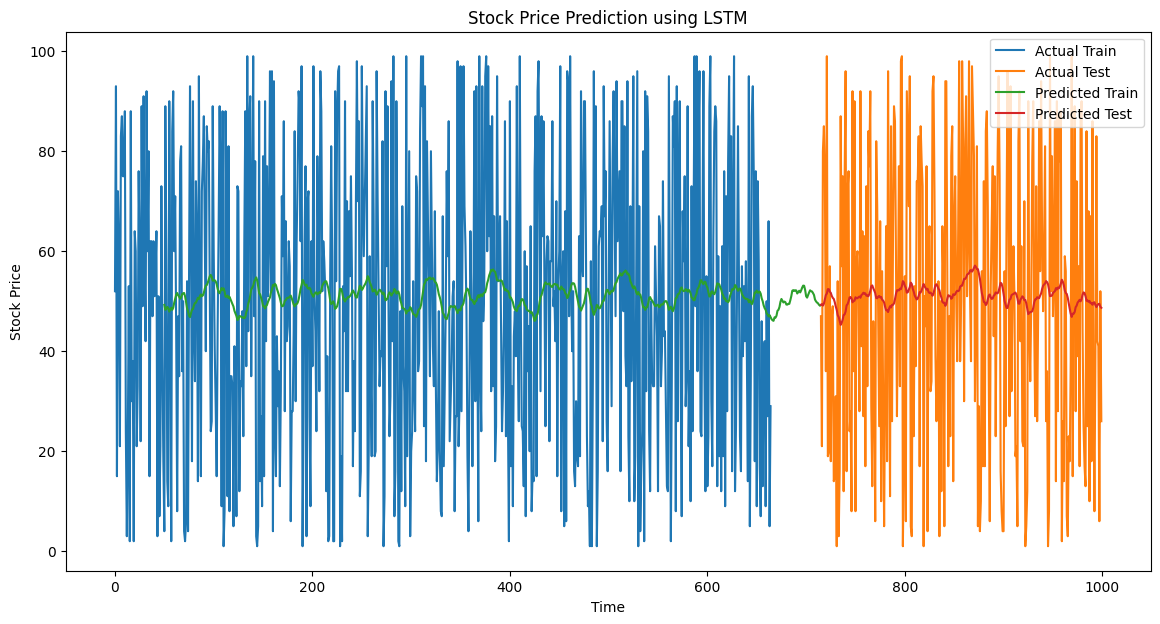

In [18]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[:len(train_predictions)], df['Close'][:len(train_predictions)], label='Actual Train')
plt.plot(df.index[len(train_predictions)+sequence_length:len(train_predictions)+sequence_length+len(test_predictions)],
         df['Close'][len(train_predictions)+sequence_length:len(train_predictions)+sequence_length+len(test_predictions)],
         label='Actual Test')
plt.plot(df.index[sequence_length:len(train_predictions)+sequence_length], train_predictions, label='Predicted Train')
plt.plot(df.index[len(train_predictions)+sequence_length:], test_predictions, label='Predicted Test')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()